# New Section

In [ ]:
## In this section, we will convert the audio files to the .wav format and then extract the MFCCs from them, create a dataset from those extracted features.


In [1]:
import numpy as np
import pandas as pd
import librosa as lb
import os
import matplotlib.pyplot as plt

In [2]:
import IPython.display as ipd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


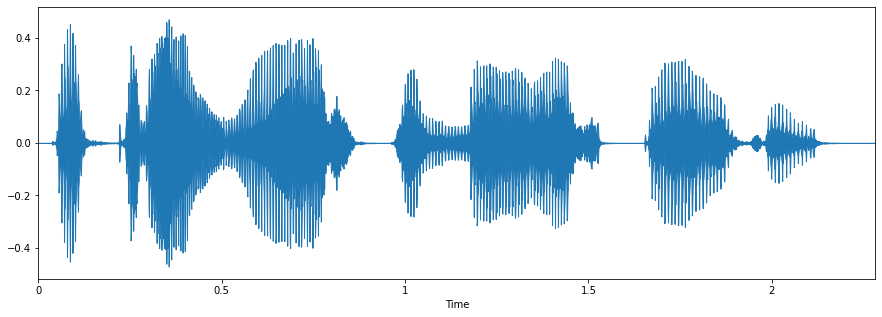

In [5]:
import librosa.display
filename = "/content/drive/MyDrive/Masters Project/Dataset/Audio/k1.wav"
plt.figure(figsize=(15,5))
data, sampleRate = librosa.load(filename)
librosa.display.waveplot(data, sampleRate)
ipd.Audio(filename, rate=sampleRate)

In [ ]:
sampleRate

22050

In [ ]:
data #normalized audio data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.2033254e-05,
       3.2243388e-05, 1.6364798e-05], dtype=float32)

In [ ]:
# plotting the melFrequency cfs
mfccs = lb.feature.mfcc(y=data, sr=sampleRate, n_mfcc=40)
print(mfccs)

[[-6.2966919e+02 -6.2966919e+02 -6.2966919e+02 ... -6.1463416e+02
  -6.1386353e+02 -6.1349512e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.0206226e+01
   2.1009371e+01  2.1263016e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.7288525e+01
   1.7323799e+01  1.6947605e+01]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5008339e+00
  -7.4121034e-01 -4.6424079e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5147593e+00
  -4.5054126e-01 -5.9789431e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7989013e+00
  -1.1214694e+00 -1.5751793e+00]]


In [ ]:
!pip install pydub

In [ ]:
# script to convert the m4a files to wav format      
import os
import argparse

from pydub import AudioSegment



In [ ]:
formats_to_convert = ['.m4a']
for (dirpath, dirnames, filenames) in os.walk("/content"):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):
            filepath = dirpath + '/' + filename
            (path, file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.', '')
            try:
                track = AudioSegment.from_file(filepath,
        file_extension_final)
                wav_filename = filename.replace(file_extension_final, 'wav')
                wav_path = dirpath + '/' + wav_filename
                print('CONVERTING: ' + str(filepath))
                file_handle = track.export(wav_path, format='wav')
                os.remove(filepath)
            except:
                print("ERROR CONVERTING " + str(filepath))

# Rename folder M4a_files as wav_files
# !mv M4a_files wav_files

CONVERTING: /content/sample1.m4a
